In [1]:
import pickle
import numpy as np
from sets import Set

/Users/richardakira/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: the sets module is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
files = ['airports', 'events_US', 'fares', 'flight_traffic', 'stock_prices', 'weather']
data = {}
for file in files:
    with open(file + '2.pkl', 'rb') as f:
        data[file] = pickle.load(f)

In [3]:
fareData = data['fares']
print fareData

[[1 u'AA' u'CLT' ... 0 0 0]
 [1 u'DL' u'DTW' ... 0 0 28]
 [1 u'DL' u'MSP' ... 0 0 0]
 ...
 [4 u'WN' u'BDL' ... 0 0 0]
 [4 u'WN' u'HRL' ... 0 0 0]
 [4 u'UA' u'EVV' ... 0 0 0]]


In [27]:
route = fareData[:,2] + fareData[:,3] 

In [28]:
rtDistMap = {}
for i in range(fareData.shape[0]):
    rt = route[i]
    dist = fareData[i][4]
    rtDistMap[rt] = dist
print rtDistMap

{u'STTTPA': 1297, u'ATLBOI': 1838, u'DFWAUS': 190, u'MDWSTL': 251, u'FLLPDX': 2694, u'SFBBIS': 1628, u'ACKPVD': 78, u'HOURSW': 853, u'VLDMLB': 243, u'GJTSBP': 719, u'ROASBY': 254, u'LEXTPA': 704, u'JLNDFW': 327, u'ATLBOS': 946, u'BZNABQ': 778, u'HNLDCA': 4840, u'BUFSJC': 2294, u'JAXMSY': 514, u'BZNSGF': 1090, u'JAXMSP': 1174, u'MSNBIS': 612, u'BHMPHX': 1455, u'DTWOKC': 900, u'SGFOMA': 310, u'GRRAZA': 1561, u'TULCVG': 646, u'OKCDSM': 474, u'SJUDEN': 2733, u'EWRBNA': 748, u'GRRAZO': 45, u'SHVVPS': 452, u'MSLBNA': 109, u'BHMPHL': 772, u'LAXSNA': 36, u'MSYSRQ': 501, u'CPRCOD': 170, u'ATLJAX': 270, u'BNASLC': 1404, u'RNOMEM': 1663, u'DLHRHI': 155, u'MGMTLH': 178, u'CMHXNA': 672, u'AZACLE': 1723, u'ATLJAC': 1572, u'AMADEN': 359, u'GNVAGS': 254, u'OKCSFO': 1384, u'STLPIT': 554, u'ATLECP': 240, u'ATLJAN': 341, u'MSPPNS': 1047, u'HVNALB': 113, u'DCAAVL': 384, u'ECPPBI': 429, u'SAVLGA': 722, u'BUFSJU': 1845, u'SFBHTS': 665, u'HNLITO': 216, u'BDLPBI': 1133, u'RDDSEA': 479, u'OMAEWR': 1134, u'CHOD

In [5]:
print route

[u'CLTSGF' u'DTWSAN' u'MSPISN' ... u'BDLONT' u'HRLTUL' u'EVVHPN']


In [6]:
numOfPassengers = np.zeros(fareData[:,5].shape, dtype=int)
for i in range(1, 251):
    numOfPassengers += fareData[:,i+4].astype(int)
print numOfPassengers

[ 611 2232  594 ...    1    1    1]


In [7]:
totalRevenue = np.zeros(fareData[:,5].shape, dtype=int)
for i in range(1, 251):
    totalRevenue += fareData[:,i+4].astype(int)*i*10
print totalRevenue

[  98510 1041350   74660 ...     420     370     540]


In [8]:
averageFare = totalRevenue.astype(float)/numOfPassengers.astype(float)
print averageFare

[161.22749591 466.5546595  125.69023569 ... 420.         370.
 540.        ]


In [9]:
importantFareData = {}
for i in range(route.shape[0]):
    if route[i] in importantFareData:
        importantFareData[route[i]][fareData[i][0]] = averageFare[i]
    else:
        
        importantFareData[route[i]]

KeyError: u'CLTSGF'

In [10]:
averageFarePerMile = averageFare/fareData[:,4]
print averageFarePerMile

[0.2277224518479477 0.23852487704407357 0.23020189686856354 ...
 0.16921837228041903 0.5323741007194245 0.7049608355091384]


In [11]:
setOfRoutes = Set(route)
quarter1 = {}
quarter2 = {}
quarter3 = {}
quarter4 = {}
print setOfRoutes

Set([u'STTTPA', u'ATLBOI', u'DFWAUS', u'MDWSTL', u'FLLPDX', u'SFBBIS', u'ACKPVD', u'HOURSW', u'VLDMLB', u'GJTSBP', u'ROASBY', u'LEXTPA', u'JLNDFW', u'ATLBOS', u'BZNABQ', u'HNLDCA', u'BUFSJC', u'JAXMSY', u'BZNSGF', u'JAXMSP', u'MSNBIS', u'BHMPHX', u'DTWOKC', u'SGFOMA', u'GRRAZA', u'TULCVG', u'OKCDSM', u'SJUDEN', u'EWRBNA', u'GRRAZO', u'SHVVPS', u'MSLBNA', u'BHMPHL', u'LAXSNA', u'MSYSRQ', u'CPRCOD', u'ATLJAX', u'BNASLC', u'RNOMEM', u'DLHRHI', u'MGMTLH', u'CMHXNA', u'AZACLE', u'ATLJAC', u'AMADEN', u'GNVAGS', u'OKCSFO', u'STLPIT', u'ATLECP', u'ATLJAN', u'MSPPNS', u'HVNALB', u'DCAAVL', u'ECPPBI', u'SAVLGA', u'BUFSJU', u'SFBHTS', u'HNLITO', u'BDLPBI', u'RDDSEA', u'OMAEWR', u'CHODAY', u'BISMCI', u'OAKSJU', u'IAHDCA', u'OMAFNT', u'CIDIND', u'MEMHSV', u'CLTSFO', u'PIEORF', u'ATLAGS', u'OAKSJC', u'PWMCAE', u'JANAEX', u'COSHSV', u'BNATYS', u'SGFFNT', u'MSPELP', u'FAYBWI', u'PNSCVG', u'DHNTLH', u'SFBDSM', u'FAIBOI', u'TRISFB', u'JACRKS', u'TPALGA', u'MHTAVP', u'CLEILM', u'MCICHS', u'ABEPVD', u'RIC

In [12]:
ID = fareData[:,2] + fareData[:,3] + fareData[:,1] + fareData[:,0].astype(str)

In [13]:
print ID

[u'CLTSGFAA1' u'DTWSANDL1' u'MSPISNDL1' ... u'BDLONTWN4' u'HRLTULWN4'
 u'EVVHPNUA4']


In [14]:
indexDict = {}
for i in range(ID.shape[0]):
    indexDict[ID[i]] = i

In [15]:
print indexDict

{u'SBPIAD--4': 79929, u'SGFORDAA1': 2163, u'SGFORDAA2': 24052, u'SGFORDAA3': 48253, u'BOSAUSWN3': 41540, u'BOSAUSWN2': 21360, u'BOSAUSWN1': 6987, u'LAXMSNUA3': 46988, u'DTWBUFAA1': 11437, u'DTWBUFAA2': 37287, u'OMACRPWN4': 70484, u'SFOJFKAA1': 2013, u'SFOJFKAA2': 20934, u'SFOJFKAA3': 43237, u'JFKAVP--1': 10124, u'JFKAVP--3': 47370, u'JFKAVP--2': 36030, u'MTJORDAA3': 50197, u'MTJORDAA2': 25433, u'MTJORDAA1': 8927, u'SUNORDUA4': 70983, u'BFLMRY--3': 49355, u'BFLMRY--2': 40336, u'MSYPITG42': 33008, u'MSYPITG43': 51647, u'SDFFNTWN3': 47158, u'MSYPITG41': 10982, u'MSPRICDL3': 46950, u'MSPRICDL2': 19530, u'MSPRICDL1': 3297, u'BOSRDU--3': 42321, u'RSWSEA--2': 34286, u'JNUCDVAS4': 72059, u'TYSBTR--2': 32039, u'LITBWIWN4': 68070, u'MSPDALWN1': 7592, u'LASRNOG42': 33326, u'LASRNOG41': 11533, u'MSPDALWN2': 21933, u'MSPDALWN4': 65806, u'LASRNOG44': 61901, u'SHVBHM--3': 58823, u'SHVBHM--2': 30585, u'GJTFLG--4': 80700, u'MCOOMA--3': 59891, u'SEAJNU--3': 47372, u'SEAJNU--2': 32557, u'CHSOKCWN3': 5439

In [16]:
IDSet = Set(ID)
listOfAirlines = Set(fareData[:,1])
routeAirlinesDict = {}
for rt in route[:10]: #setOfRoutes:
    airForRoute = []
    for airline in listOfAirlines:
        boo = False
        for i in ['1','2','3','4']:
            if rt+airline+i in ID:
                boo = True
        if boo:
            airForRoute.append(airline)
    routeAirlinesDict[rt] = airForRoute[:]
print routeAirlinesDict

{u'CLTSGF': [u'AA', u'--'], u'DTWSAN': [u'DL', u'WN', u'NK'], u'DFWIND': [u'AA', u'AS', u'--'], u'KOALAX': [u'DL', u'HA', u'AA', u'AS', u'--', u'UA'], u'DFWMHK': [u'AA', u'--'], u'ATLRIC': [u'DL', u'WN', u'AA', u'--'], u'MSPISN': [u'DL', u'--'], u'CLTRDU': [u'WN', u'AA', u'--'], u'CLTTPA': [u'WN', u'AA', u'--'], u'LGAMCO': [u'DL', u'WN', u'B6', u'AA', u'--']}


In [17]:
indexDict['SFOLAXAA2']

20887

In [18]:
print numOfPassengers[20887]
print averageFare[20887]

4377
83.3219099840073


In [21]:
setOfAirlines = Set(['UA', 'AA', 'US', 'F9', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'EV', 'HA', 'MQ', 'VX', '--'])
quarter = ['1', '2', '3', '4']
routeToAverageCost = {}
routeAirlineQuarterToACPM = {}
routeToAC = {}
for rt in setOfRoutes:
    totalCost = 0.0
    totalPassengers = 0
    for airline in setOfAirlines:
        for qt in quarter:
            key = rt+airline+qt
            if key in indexDict:
                totalCost += totalRevenue[indexDict[key]]
                totalPassengers += numOfPassengers[indexDict[key]]
    if totalPassengers > 0:
        routeToAC[rt] = totalCost/totalPassengers
#for key in indexDict:
#    routeAirlineQuarterToACPM[key] = averageFarePerMile[indexDict[key]]
#print routeAirlineQuarterToACPM
print routeToAC
#pickle.dump(routeAirlineQuarterToACPM, open("RAQ_ACPM.pkl", "wb"), 2)
pickle.dump(routeToAC, open("R_AC.pkl", "wb"), 2)

{u'STTTPA': 210.0, u'ATLBOI': 463.875, u'DFWAUS': 43.13702285647987, u'MDWSTL': 63.491345905450785, u'FLLPDX': 589.0909090909091, u'OKCDSM': 72.0, u'ACKPVD': 37.5, u'HOURSW': 148.28571428571428, u'VLDMLB': 40.0, u'GJTSBP': 105.0, u'DROTUL': 350.0, u'JLNDFW': 76.25037436358191, u'ATLBOS': 229.18733895821754, u'BZNABQ': 155.0, u'HNLDCA': 540.0, u'IAHJAX': 196.37838620889468, u'JAXMSY': 112.0, u'MDWPWM': 238.0952380952381, u'ECPMGM': 50.0, u'JAXMSP': 280.4058853373922, u'MSNBIS': 50.0, u'BHMPHX': 226.25, u'DTWOKC': 223.7955298013245, u'SGFOMA': 105.0, u'MSNBIL': 262.85714285714283, u'EUGSBA': 100.0, u'EWRBNA': 192.27061616265868, u'GRRAZO': 12.692307692307692, u'BHMPHL': 196.69213973799125, u'INDMLB': 90.0, u'LAXSNA': 13.651635720601238, u'MSYSRQ': 240.0, u'CPRCOD': 40.0, u'ATLJAX': 62.82261612923502, u'BNASLC': 362.76641808996874, u'RNOMEM': 190.0, u'DLHRHI': 30.0, u'MGMTLH': 25.0, u'CMHXNA': 50.0, u'ATLJAC': 402.4599831508003, u'AMADEN': 82.93548387096774, u'EWREYW': 301.9230769230769, 

In [22]:
with open('HHI.pickle', 'rb') as f:
    data['HHI'] = pickle.load(f)

In [23]:
print data['HHI']

defaultdict(<type 'list'>, {'JFK': [0.19884861761831266, 0.20347676340989274, 0.20736848596661697, 0.20827717836390536], 'GSP': [0.12063475172985998, 0.08930523236804093, 0.08029674173650816, 0.06677951132391446], 'FNT': [0.006333754171993296, 0.0026952443592896578, 0.02814379825122293, 0.04819022980975481], 'GST': [1, 1], 'SIT': [1, 0.7079702691688179, 0.49734906231398845, 0.98885802565463], 'MIA': [0.49622757777594595, 0.5007158018968921, 0.536962704037838, 0.48603255976620535], 'BOS': [0.15317106608495043, 0.1453924671455442, 0.14044671272272477, 0.14413835753705945], 'LIH': [0.3835474318363451, 0.40335139354822874, 0.40400955814732303, 0.3846734578611364], 'BGM': [1, 1, 1, 1], 'LIT': [0.07722441376287532, 0.038136720007044676, 0.01629651714593801, 0.01897253200309638], 'BOI': [0.24661519490248562, 0.24887780690900238, 0.23222531436817162, 0.30554075335135883], 'BGR': [1, 0.29373177842565595, 0.05985772789204918, 0.1399857157432914], 'MDT': [0.06962291089275219, 0.11686777998152882,

In [24]:
with open('HHI_route.pickle', 'rb') as f:
    data['HHI_route'] = pickle.load(f)

In [25]:
print data['HHI_route']

defaultdict(<type 'list'>, {('SLC', 'TPA'): [-1, -1, -1, 1], ('MSP', 'HNL'): [1, 1, 1, 1], ('SEA', 'GEG'): [0.0022215911395999655, 0.016353959275520857, 0.029674463210613178, 0.029080413139774608], ('MSP', 'LAN'): [1, 0.49519890260630994, 1, 1], ('FLL', 'DTW'): [0.2326609823869132, 0.20525118839984946, 0.18338468316919573, 0.1511702207077884], ('OAK', 'MCI'): [1, 1, 1, 1], ('TUS', 'DEN'): [0.06048268316290031, 0.08254564028397128, 0.24395156733080348, 0.15109619669729246], ('PHX', 'MDW'): [1, 1, 1, 1], ('ATL', 'GPT'): [0.4049586776859506, 0.6808888848477683, 0.7011761864509114, 0.7813297193877551], ('PIT', 'MSP'): [0.20847440238021941, 0.24266057525951557, 0.4168195794485221, 0.30362349021241153], ('PHX', 'SMF'): [0.0017880816326529825, 0.0011275514961017752, 0.00013981464572676572, 0.24785344175124682], ('TPA', 'CLT'): [1, 1, 1, 1], ('SNA', 'DTW'): [-1, -1, 1, 1], ('AUS', 'STL'): [1, 1, 1, 1], ('PDX', 'DEN'): [0.08690199845246675, 0.11598480358120655, 0.12608513947355848, 0.0598385823

In [26]:
setOfAirlines = Set(['UA', 'AA', 'US', 'F9', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'EV', 'HA', 'MQ', 'VX', '--'])
quarter = ['1', '2', '3', '4']
routeToAverageCost = {}
routeAirlineQuarterToACPM = {}
RQ_AC = {}
for rt in setOfRoutes:
    for qt in quarter:
        totalCost = 0.0
        totalPassengers = 0
        for airline in setOfAirlines:
            key = rt+airline+qt
            if key in indexDict:
                totalCost += totalRevenue[indexDict[key]]
                totalPassengers += numOfPassengers[indexDict[key]]
        if totalPassengers > 0:
            RQ_AC[rt+qt] = totalCost/totalPassengers
#for key in indexDict:
#    routeAirlineQuarterToACPM[key] = averageFarePerMile[indexDict[key]]
#print routeAirlineQuarterToACPM
print RQ_AC
#pickle.dump(routeAirlineQuarterToACPM, open("RAQ_ACPM.pkl", "wb"), 2)
pickle.dump(RQ_AC, open("RQ_AC.pkl", "wb"), 2)

{u'DENFMN3': 78.18181818181819, u'BFLSFO4': 60.364025695931474, u'DENFMN1': 65.88235294117646, u'BFLSFO1': 57.07692307692308, u'BFLSFO3': 47.91327913279133, u'BFLSFO2': 53.61963190184049, u'GRRAUS4': 303.3333333333333, u'GRRAUS3': 186.66666666666666, u'GRRAUS2': 224.44444444444446, u'GRRAUS1': 290.0, u'ERIJFK3': 40.0, u'TLHBHM3': 25.0, u'EWRCAK4': 86.66666666666667, u'EWRCAK1': 91.93763919821826, u'EWRCAK2': 119.8812351543943, u'EWRCAK3': 76.50853889943075, u'DENFMN4': 23.333333333333332, u'EWRISP3': 10.0, u'EWRISP2': 10.0, u'EWRISP4': 15.0, u'SJUDAL2': 674.5333333333333, u'SJUDAL3': 605.9130434782609, u'SJUDAL1': 484.375, u'SJUDAL4': 534.6774193548387, u'AUSFNT2': 155.0, u'AUSFNT3': 271.42857142857144, u'FCABIL3': 77.6923076923077, u'DTWAUS4': 285.6005859375, u'DTWAUS3': 280.140503875969, u'DTWAUS2': 281.84406482698205, u'DTWAUS1': 272.4568668046929, u'MEMRSW1': 20.0, u'MEMRSW2': 100.0, u'CHSORF4': 112.5, u'CHSORF2': 126.66666666666667, u'CHSORF3': 120.0, u'CHSORF1': 64.0, u'DCACAE4':

In [30]:
HHIList = []
ACPMList = []
for rt in setOfRoutes:
    for qt in quarter:
        if rt+qt in RQ_AC:
            key = (rt[:3],rt[3:])
            if key in data['HHI_route']:
                if data['HHI_route'][key][int(qt)-1] >= 0.0:
                    HHIList.append(data['HHI_route'][key][int(qt)-1])
                    ACPMList.append(RQ_AC[rt+qt]/rtDistMap[rt])

print HHIList
print ACPMList
            
        

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.42703412271250424, 0.23201976880332756, 0.19165247018739348, 0.18814394435083667, 1, 0.0024999999999999467, 1, 1, 0.0011890606420927874, 0.4699576757248529, 1, 1, 0.04905184451150846, 0.049772321766865524, 0.09082379433289556, 0.23148807404770366, 1, 1, 0.38102812686947374, 0.38004779108527575, 0.39423585305723474, 0.3518392332680671, 0.9560493827160497, 0.8440081961795229, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9481730819874645, 0.9889350782258419, 0.9890110724070151, 0.8269457197360377, 0.509435702100645, 0.5708641975308644, 0.5034240362811788, 0.7802272246664708, 1, 1, 1, 1, 1, 1, 1, 1, 0.8751300728407911, 0.7947238747671412, 1, 1, 1, 0.9272976680384089, 1, 0.9070294784580497, 1, 1, 1, 1, 1, 1, 1, 1, 0.24074638768999815, 0.2237455627666822, 0.05896215734814635, 0.11170704820966383, 1, 0.632130602133735, 0.09433034796776907, 0.09172244897959203, 1, 1, 1, 0.2568209692937038, 0.5642956892012547, 0.5900021003990759, 0.2902541085830883, 1

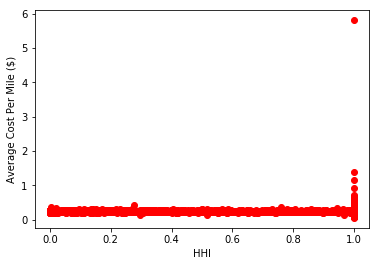

In [36]:
import matplotlib.pyplot as plt
plt.plot(HHIList, ACPMList, 'ro')
plt.xlabel('HHI')
plt.ylabel('Average Cost Per Mile ($)')
plt.show()

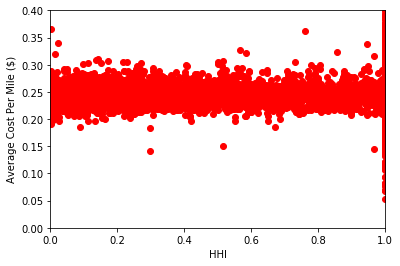

In [37]:
plt.plot(HHIList, ACPMList, 'ro')
plt.axis([0.0, 1.0, 0, 0.4])
plt.xlabel('HHI')
plt.ylabel('Average Cost Per Mile ($)')
plt.show()